In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [8]:
movies = pd.read_csv("https://raw.githubusercontent.com/33phoebe/datasets/master/fandango_score_comparison.csv")
movies.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


the dataset is cleaned by FiveThirtyEight and contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

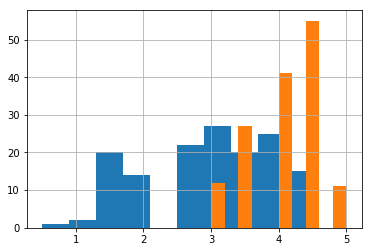

In [8]:
movies["Metacritic_norm_round"].hist()
movies["Fandango_Stars"].hist()

- metacritic is more normally distributed, with the highest freq occurs in the middle, around 3 points. Also a fair amount of movies have lower values and some at higher
- fandango's stars are skewed, with highest freq occurs around 4.5, which is significantly higher than the metacritic record. Also, there is no movie having a score lower than 3, and quite a few at 5.

In [23]:
fan = movies["Fandango_Stars"]
meta = movies["Metacritic_norm_round"]
print("Fandango Mean:",fan.mean(),"\nMetacritic Mean:",meta.mean())
print("Fandango Median:", fan.median(), "\nMetacritic Median:", meta.median())
print("Fandango Stdev:", fan.std(), "\nMetacritic Stdev:", meta.std())

Fandango Mean: 4.089041095890411 
Metacritic Mean: 2.9726027397260273
Fandango Median: 4.0 
Metacritic Median: 3.0
Fandango Stdev: 0.5403859779787333 
Metacritic Stdev: 0.9909605613743364


Fandango doesn't explain in much details of their methodology, only vaguely mentions they incorporate a few sources; metacritics explains it uses a 100-point weighted average based on the critic's input and how their reviews are categorized into three groups representing their quality.

- Metacritic's mean is fairly close to median, slightly lower, as the graph above shows, metacritics have more higher rated movies than the ones that have really bad reviews, which make sense. And the fact that these two numbers are close represent the existence of outliers are moderate. On the other hand, the reviews of Fandango skews to the right, with the highest freq occurs at 4.5, which isn't normal given the perfect score is 5. 
- Fandango's star system is based on a 5 point discrete rating system, and the mininum value is around 3, made the range of variance very small; and metacritic scores, although of significant amount, are converted from a 100-point system and have more variety, also, even not in large amount, they have movies have extreme scores and make the variance much higher.
- The mean of Fandango is much higher than Metacritic shows that its score is skewed.

Text(0,0.5,'metacritic review')

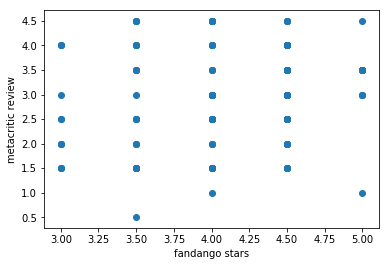

In [37]:
fig, ax = plt.subplots()
ax.scatter(fan, meta)
ax.set_xlabel("fandango stars")
ax.set_ylabel("metacritic review")

In [43]:
movies["fm_diff"] = abs(fan - meta)
movies.sort_values("fm_diff", inplace = True, ascending = False)
movies.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4.0
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,3.0,1.5,2.5,2.5,108,19222,6835,0.3,3.0
19,Pixels (2015),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.0,2.5,1.5,2.5,3.0,246,19521,3886,0.4,3.0
134,The Longest Ride (2015),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,3.5,1.5,2.5,3.5,49,25214,2603,0.0,3.0
133,Paul Blart: Mall Cop 2 (2015),5,36,13,2.4,4.3,3.5,3.5,0.25,1.80,...,0.5,2.0,0.5,1.0,2.0,211,15004,3054,0.0,3.0


In [46]:
from scipy.stats import pearsonr
r, p_value = pearsonr(fan, meta)
print(r, p_value)

0.178449190739 0.0311615162285


The correlation is fairly low, while the significance is relatively high, it could mean either metacritic isn't a major source for fandango score, thus their scores are independent of each other; or fandango score has been altered from original scores severely based on metacritic score, thus the covariance compared to their individual variance is low.

In [51]:
from scipy.stats import linregress
slope, intercept, r, p_value, stderr_slope = linregress(meta, fan)
print(slope, intercept, r, p_value)
pred_3 = 3 * slope + intercept
pred_1 = 1 * slope + intercept
pred_5 = 5 * slope + intercept
print(pred_3, pred_1, pred_5)

0.0973110779739 3.7997739189 0.178449190739 0.0311615162285
4.09170715282 3.89708499687 4.28632930877


- Based on the linear regression model, a movie with a 3.0 score would get it a 4.09 on Fandango, more than 1 whole point higher

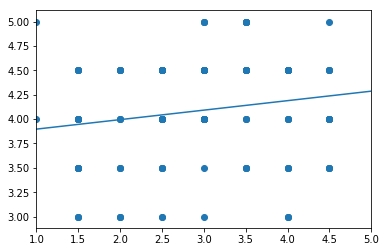

In [58]:
x = [1, 5]
y = [pred_1, pred_5]
plt.scatter(meta, fan)
plt.xlim(1, 5)
plt.plot(x, y)
plt.show()